### Data Overview

The purpose of this notebook is to download, assess, and explore the data that will be worked with in this Neurocognitive psychology project. The dataset used is the Autism Brain Imaging Data Exchange II ([ABIDE II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html)) dataset. ABIDE II was developed as a continuation to the ABIDE I dataset as part of the 1000 Functional Connectomes Project, to further encourage discovery science on the brain connectome in Autism Spectrum Disorder. This dataset consists of MRI data of patients with and without Autism, from various different sites around the world. From this dataset we will be using the anatomical data, and the [CSV](https://www.nitrc.org/ir/app/template/XDATScreen_report_xnat_projectData.vm/search_element/xnat:projectData/search_field/xnat:projectData.ID/search_value/ABIDE) file with all phenotypic information for the participants.  

#### *Loading the data*

Access to the ABIDE II dataset is granted through the NITRC website, a website where Neuroimaging Tools and Resources are shared. Here we can find the phenotpyic CSV file. Before downloading the actual brain images, it is important to get a general overview of what data we are dealing with. To do this, we begin by downloading the .csv file, and reading it as a dataframe.  

In [6]:
from os import chdir

chdir('/Users/gretivan/Desktop/Neuro_data')

In [7]:
import pandas as pd

Data_overview = pd.read_csv("Data_overview.csv")
Data_overview

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1107,1108,51583,1108,51583,SBL,SBL_0051583,1,2,35.00,...,NaN,OK,NaN,OK,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1108,1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2,49.00,...,NaN,OK,NaN,maybe,vmpfc dropout,OK,NaN,OK,NaN,0
1109,1109,1110,51585,1110,51585,SBL,SBL_0051585,1,1,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1110,1110,1111,51606,1111,51606,MAX_MUN,MaxMun_a_0051606,1,2,29.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


We can see here that there are 1112 subjects in this dataset. 

In [8]:
Data_overview.shape

(1112, 106)

In [9]:
Data_overview.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SUB_ID', 'X', 'subject', 'SITE_ID',
       'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',
       ...
       'qc_notes_rater_1', 'qc_anat_rater_2', 'qc_anat_notes_rater_2',
       'qc_func_rater_2', 'qc_func_notes_rater_2', 'qc_anat_rater_3',
       'qc_anat_notes_rater_3', 'qc_func_rater_3', 'qc_func_notes_rater_3',
       'SUB_IN_SMP'],
      dtype='object', length=106)

The demographics dataframe we are working with consists of 1112 subjects, and 106 columns depicting phenotypic information. 

#### *Assessing the demographics*

We now want to assess the demographic information to establish wheter we are working with even groups. Since the goal of this data analysis is to see whether machine learning can predict whether an image is from a male or female participant, from an autistic or a control participant, or both, it is important to make sure the training sets are of equal sizes. 

In [10]:
Data_overview.describe()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,...,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,SUB_IN_SMP
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,370.000000,...,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1112.000000
mean,555.500000,556.500000,50752.684353,556.500000,50752.684353,1.515288,-646.819245,17.048864,1.147482,-102.560892,...,100.548498,2.116388,1.103531,0.005525,0.012778,0.131138,27.218380,12.952826,0.028416,0.686151
std,321.151055,321.151055,447.680666,321.151055,447.680666,0.499991,2461.828856,8.036419,0.354745,1273.177790,...,43.552970,0.345282,0.117803,0.006464,0.011212,0.157728,42.757583,18.216671,0.021070,0.464265
min,0.000000,1.000000,50002.000000,1.000000,50002.000000,1.000000,-9999.000000,6.470000,1.000000,-9999.000000,...,33.836513,1.581108,0.709671,0.000182,0.001693,0.016117,0.000000,0.000000,-0.015812,0.000000
25%,277.750000,278.750000,50354.750000,278.750000,50354.750000,1.000000,0.000000,11.658575,1.000000,48.000000,...,69.047209,1.862772,1.026977,0.001124,0.006333,0.050888,2.000000,0.995025,0.013075,0.000000
50%,555.500000,556.500000,50724.500000,556.500000,50724.500000,2.000000,0.000000,14.660000,1.000000,75.000000,...,87.681334,2.004123,1.080727,0.003441,0.010043,0.083163,9.000000,4.972376,0.031102,1.000000
75%,833.250000,834.250000,51153.250000,834.250000,51153.250000,2.000000,1.000000,20.085000,1.000000,91.000000,...,125.779269,2.328370,1.172068,0.006977,0.015189,0.143479,33.000000,16.977985,0.042821,1.000000
max,1111.000000,1112.000000,51607.000000,1112.000000,51607.000000,2.000000,4.000000,64.000000,2.000000,100.000000,...,326.544102,3.753481,1.571101,0.080158,0.098614,1.434912,288.000000,91.735537,0.104225,1.000000


We can see here that the proportions of Autistic to control participants is pretty even. Since they are coded 1 (ASD) and 2 (Control) we would expect and even split to have a mean of around 1.5. Here we have a mean for the DX_GROUP of 1.51 so this is great. For the Sex group however, which is also coded 1 (Male) and 2 (Female), we are working with a very uneven split as seen in the mean of 1.15. 

We can double check these individually as well to make sure that we are correct in this interpretation.

In [11]:
control = Data_overview.loc[Data_overview['DX_GROUP']==2]
control

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
26,26,27,50030,27,50030,PITT,Pitt_0050030,2,0,25.12,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,1
27,27,28,50031,28,50031,PITT,Pitt_0050031,2,0,12.92,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,1
28,28,29,50032,29,50032,PITT,Pitt_0050032,2,0,19.80,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,1
29,29,30,50033,30,50033,PITT,Pitt_0050033,2,0,12.15,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,1
30,30,31,50034,31,50034,PITT,Pitt_0050034,2,0,14.77,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,1091,51566,1091,51566,SBL,SBL_0051566,2,0,41.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1091,1091,1092,51567,1092,51567,SBL,SBL_0051567,2,0,34.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1092,1092,1093,51568,1093,51568,SBL,SBL_0051568,2,0,37.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1093,1093,1094,51569,1094,51569,SBL,SBL_0051569,2,0,36.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0


In [12]:
asd = Data_overview.loc[Data_overview['DX_GROUP']==1]
asd

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1107,1108,51583,1108,51583,SBL,SBL_0051583,1,2,35.00,...,NaN,OK,NaN,OK,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1108,1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2,49.00,...,NaN,OK,NaN,maybe,vmpfc dropout,OK,NaN,OK,NaN,0
1109,1109,1110,51585,1110,51585,SBL,SBL_0051585,1,1,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1110,1110,1111,51606,1111,51606,MAX_MUN,MaxMun_a_0051606,1,2,29.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


As we can see here, we are correct in our above interpretation that the control and the ASD group are roughly even - with 573 control participants and 539 autistic participants. 

We can do the same thing to check whether the control and ASD groups are of even sizes. 

In [13]:
female = Data_overview.loc[Data_overview['SEX']==2]
female

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
34,34,35,50038,35,50038,PITT,Pitt_0050038,2,0,13.95,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,1066,51479,1066,51479,CALTECH,Caltech_0051479,2,0,20.00,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1066,1066,1067,51480,1067,51480,CALTECH,Caltech_0051480,2,0,20.80,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
1068,1068,1069,51482,1069,51482,CALTECH,Caltech_0051482,2,0,21.10,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0


In [14]:
male = Data_overview.loc[Data_overview['SEX']==1]
male

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
1107,1107,1108,51583,1108,51583,SBL,SBL_0051583,1,2,35.00,...,NaN,OK,NaN,OK,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1108,1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2,49.00,...,NaN,OK,NaN,maybe,vmpfc dropout,OK,NaN,OK,NaN,0
1109,1109,1110,51585,1110,51585,SBL,SBL_0051585,1,1,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0


There are 164 female participants, and 948 male participants. This again reiterates the uneven split we suggested above. 

We can visualise this as well. 

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

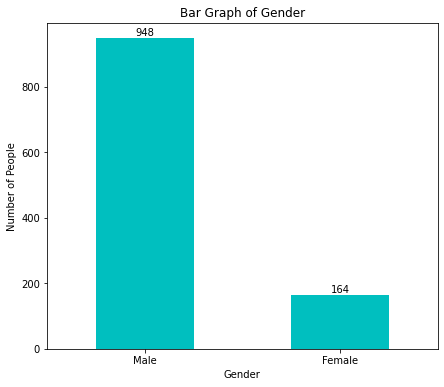

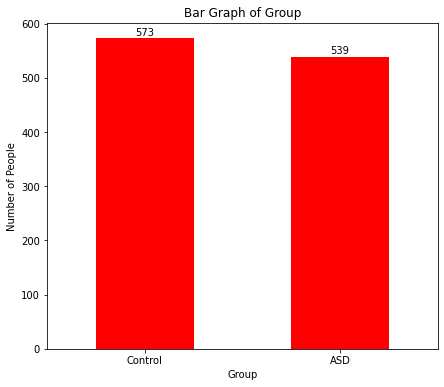

In [16]:
gender = Data_overview['SEX'].value_counts()
plt.figure(figsize=(7, 6))

ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

group = Data_overview['DX_GROUP'].value_counts()
plt.figure(figsize=(7, 6))
    
ax = group.plot(kind='bar', rot=0, color="red")
ax.set_title("Bar Graph of Group", y = 1)
ax.set_xlabel('Group')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Control', 'ASD'))


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()




####  *Matching*

<div class="alert alert-warning"> As we saw above, we are working with very uneven groups in terms of gender. The ASD and control participant split seems fine thus this doesn't require any alteration. However, in order to avoid any biases from the male group, we will create a matched pair sample instead, with one male participant being matched to a female participant based on whether they are in the ASD/control group and on their age.</div>

In [17]:
import numpy as np

In [18]:
def find_matching (female_df, male_df):
    matched_list_asd, matched_list_control = [],[]
    
    for group in [1, 2]:
        female_group = female_df[female_df['DX_GROUP']==group]
        male_group = male_df[male_df['DX_GROUP']==group]
        
        age_male = male_group['AGE_AT_SCAN'].to_numpy()
        id_male = male_group['subject']
        used_male = []
    
        for index, row in female_group.iterrows():
            age_female = row['AGE_AT_SCAN']
            min_dif = np.argsort(np.abs(age_male - age_female))
            matched_idx = min_dif[0]

            if matched_idx in used_male:
                counter = 0
                while matched_idx in used_male: 
                    counter += 1
                    matched_idx = min_dif[counter]
                
            used_male.append(matched_idx)
                    
            if group == 1:
                matched_list_asd.append([row['subject'], id_male.iloc[matched_idx]])
            else:
                matched_list_control.append([row['subject'], id_male.iloc[matched_idx]])

    return matched_list_asd, matched_list_control


In [19]:
matched_list_asd, matched_list_control = find_matching(female, male)

<div class="alert alert-warning">Here we are defining a function which aims to create two matched lists. In both lists, one male participant is being assigned, or matched, with a female participant based on the group they are in and their age. So for every female participant, there is a male participant who is of the same age and in the same group.</div>

In [20]:
print(matched_list_asd)

[[50005, 50243], [50023, 50148], [50029, 50823], [50057, 50191], [50119, 50686], [50125, 50652], [50127, 50411], [50185, 51236], [50276, 50273], [50278, 50805], [50284, 50286], [50285, 50298], [50300, 50310], [50302, 51214], [50309, 50982], [50319, 50120], [50321, 50124], [50407, 50405], [50604, 50155], [50615, 51175], [50619, 50517], [50620, 50618], [50621, 50608], [50623, 51239], [50624, 50626], [50627, 50978], [50644, 50711], [50648, 51320], [50650, 51582], [50743, 50323], [50744, 50613], [50749, 50235], [50792, 50802], [50795, 51348], [50796, 50122], [50798, 50791], [50952, 51011], [50953, 50800], [50954, 50522], [50955, 50294], [50956, 51300], [50957, 51220], [50958, 50144], [50959, 51459], [50960, 50651], [50961, 50499], [50962, 50003], [51162, 50609], [51164, 50793], [51167, 51165], [51170, 50993], [51207, 50183], [51215, 51202], [51219, 50972], [51226, 50965], [51228, 51166], [51230, 51472], [51242, 50510], [51321, 51330], [51325, 50708], [51460, 50497], [51462, 51465], [51463,

In [21]:
print(matched_list_control)

[[50036, 50417], [50038, 50568], [50049, 50427], [50059, 51156], [50113, 50116], [50114, 51556], [50201, 50043], [50205, 50423], [50206, 50554], [50208, 50436], [50213, 51199], [50215, 51128], [50336, 51269], [50338, 51097], [50340, 50330], [50341, 50344], [50343, 51276], [50348, 51112], [50353, 51314], [50354, 50575], [50356, 50331], [50357, 51280], [50361, 50432], [50369, 50422], [50373, 50391], [50374, 50165], [50375, 50378], [50379, 51100], [50380, 50328], [50414, 51135], [50555, 51101], [50557, 51075], [50558, 51099], [50563, 50727], [50565, 50571], [50569, 50570], [50572, 51140], [50576, 50809], [50656, 50698], [50661, 50109], [50669, 51343], [50722, 50200], [50723, 50360], [50730, 50578], [50735, 50050], [50736, 50426], [50778, 50816], [50780, 51085], [50783, 50359], [50784, 51080], [50788, 50159], [50790, 51081], [50810, 51281], [50812, 50817], [50820, 50164], [51036, 51069], [51038, 51183], [51039, 50814], [51040, 50777], [51041, 51082], [51042, 51083], [51044, 50773], [51045,

In [22]:
matched_list_asd_np =np.array(matched_list_asd)
matched_list_asd_np.shape

(65, 2)

In [23]:
matched_list_control_np =np.array(matched_list_control)
matched_list_control_np.shape

(99, 2)

<div class="alert alert-warning"> We can see here that the list of controls is slightly longer than the list of participants with ASD.</div>

<div class="alert alert-warning"> It may be of interest to us to visualise this age matching in the two groups. </div>

In [24]:
def get_ages(male_df, female_df, matched_list):
    id_male_asd = male_df['subject'].to_numpy()
    id_female_asd = female_df['subject'].to_numpy()
    age_male = male_df['AGE_AT_SCAN'].to_numpy()
    age_female = female_df['AGE_AT_SCAN'].to_numpy()
    selected_female_age = []
    for female_id in matched_list[:, 0]:
        selected_female_age.append(age_female[np.where(id_female_asd == female_id)[0]])
    selected_female_age = np.array(selected_female_age)[:, 0]
    selected_male_age = []                         
    for male_id in matched_list[:, 1]:
        selected_male_age.append(age_male[np.where(id_male_asd == male_id)[0]])
    selected_male_age = np.array(selected_male_age)[:, 0]
    return selected_male_age, selected_female_age

In [25]:
selected_male_age_asd, selected_female_age_asd = get_ages(male, female, np.array(matched_list_asd))
selected_male_age_control, selected_female_age_control = get_ages(male, female, np.array(matched_list_control))

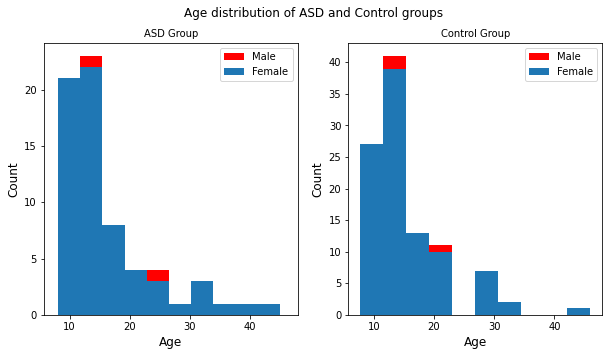

In [26]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Age distribution of ASD and Control groups')

axes[0].hist(selected_male_age_asd, color='red')
axes[0].hist(selected_female_age_asd)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('ASD Group', fontsize=10);
axes[0].legend(labels=['Male', 'Female'])

axes[1].hist(selected_male_age_control, color='red')
axes[1].hist(selected_female_age_control)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Control Group', fontsize=10);
axes[1].legend(labels=['Male', 'Female'])

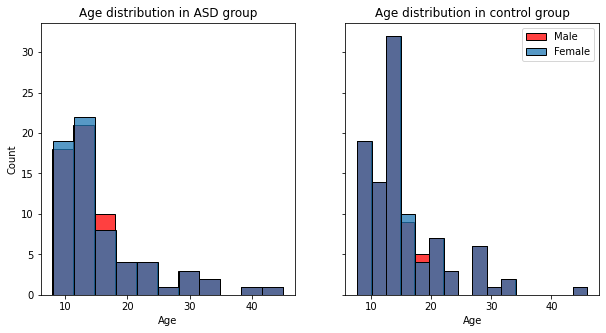

In [27]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))

sns.histplot(selected_male_age_asd, color='red', ax=axes[0])
sns.histplot(selected_female_age_asd, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_title('Age distribution in ASD group')

sns.histplot(selected_male_age_control, color='red', ax=axes[1])
sns.histplot(selected_female_age_control, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_title('Age distribution in control group')

plt.legend(labels=['Male', 'Female'])

plt.show()

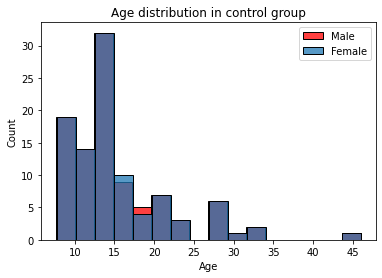

In [28]:
sns.histplot(selected_male_age_control, color='red')
sns.histplot(selected_female_age_control)
plt.xlabel('Age')
plt.title('Age distribution in control group')
plt.legend(labels=['Male', 'Female'])

plt.show()

<div class="alert alert-warning"> We may also want to visualise how well our matching went. To do this we need to subtract the male ages from the female ages in the various groups. In theory we should get as little difference in age as possible to assure that we matched as well as we could. </div>

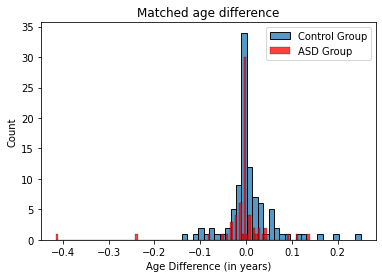

In [29]:
sns.histplot(selected_female_age_control - selected_male_age_control)
sns.histplot(selected_female_age_asd - selected_male_age_asd, color='red')

plt.xlabel('Age Difference (in years)')
plt.title('Matched age difference')
plt.legend(labels=['Control Group', 'ASD Group'])

plt.show()

<div class="alert alert-warning"> As hoped for, both the control and the ASD group are matched very well, with the largest age difference being 0,4 years of age. We can see by the distribution that most females were matched perfectly with a male participant. </div>

#### *Demographic information of matched sample*

It would now be valuable to assess what kind of participants we have in our matched sample. 

In [30]:
joined_list = []
for list1 in (matched_list_asd):
     joined_list.extend(list1)
for list1 in (matched_list_control):
     joined_list.extend(list1)
        
len(joined_list)

328

For this we created a joined list of the asd and control lists.

In [31]:
joined_list

[50005,
 50243,
 50023,
 50148,
 50029,
 50823,
 50057,
 50191,
 50119,
 50686,
 50125,
 50652,
 50127,
 50411,
 50185,
 51236,
 50276,
 50273,
 50278,
 50805,
 50284,
 50286,
 50285,
 50298,
 50300,
 50310,
 50302,
 51214,
 50309,
 50982,
 50319,
 50120,
 50321,
 50124,
 50407,
 50405,
 50604,
 50155,
 50615,
 51175,
 50619,
 50517,
 50620,
 50618,
 50621,
 50608,
 50623,
 51239,
 50624,
 50626,
 50627,
 50978,
 50644,
 50711,
 50648,
 51320,
 50650,
 51582,
 50743,
 50323,
 50744,
 50613,
 50749,
 50235,
 50792,
 50802,
 50795,
 51348,
 50796,
 50122,
 50798,
 50791,
 50952,
 51011,
 50953,
 50800,
 50954,
 50522,
 50955,
 50294,
 50956,
 51300,
 50957,
 51220,
 50958,
 50144,
 50959,
 51459,
 50960,
 50651,
 50961,
 50499,
 50962,
 50003,
 51162,
 50609,
 51164,
 50793,
 51167,
 51165,
 51170,
 50993,
 51207,
 50183,
 51215,
 51202,
 51219,
 50972,
 51226,
 50965,
 51228,
 51166,
 51230,
 51472,
 51242,
 50510,
 51321,
 51330,
 51325,
 50708,
 51460,
 50497,
 51462,
 51465,
 51463,


In [32]:
selected_df = Data_overview.loc[Data_overview['subject'].isin(joined_list)]

In [33]:
selected_df

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1080,1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1083,1083,1084,51559,1084,51559,SBL,SBL_0051559,2,0,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
1106,1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


In [34]:
selected_df.describe()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,...,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,SUB_IN_SMP
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,105.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,328.000000
mean,570.121951,571.121951,50772.881098,571.121951,50772.881098,1.603659,-731.140244,15.695323,1.500000,-132.856667,...,106.021761,2.165669,1.090013,0.006249,0.012045,0.122540,25.021538,11.794128,0.026347,0.420732
std,303.453280,303.453280,423.357493,303.453280,423.357493,0.489884,2608.022581,7.064849,0.500764,1382.180332,...,46.466386,0.366371,0.116777,0.006495,0.011785,0.157514,43.286187,17.611243,0.021531,0.494431
min,1.000000,2.000000,50003.000000,2.000000,50003.000000,1.000000,-9999.000000,7.660000,1.000000,-9999.000000,...,33.836513,1.621089,0.709671,0.000197,0.001693,0.016117,0.000000,0.000000,-0.015812,0.000000
25%,300.250000,301.250000,50377.250000,301.250000,50377.250000,1.000000,0.000000,11.200000,1.000000,48.000000,...,72.096534,1.868385,1.011522,0.001310,0.006000,0.045449,1.000000,0.552486,0.010559,0.000000
50%,602.000000,603.000000,50786.000000,603.000000,50786.000000,2.000000,0.000000,13.865000,1.500000,71.000000,...,92.036699,2.057008,1.074603,0.005388,0.009267,0.077653,7.000000,3.821656,0.029558,0.000000
75%,812.750000,813.750000,51129.750000,813.750000,51129.750000,2.000000,1.000000,17.425000,2.000000,89.000000,...,133.575097,2.427396,1.162153,0.008089,0.014513,0.130854,25.000000,14.925373,0.040873,1.000000
max,1110.000000,1111.000000,51606.000000,1111.000000,51606.000000,2.000000,4.000000,46.000000,2.000000,100.000000,...,264.504674,3.489361,1.508322,0.035617,0.098614,1.324697,288.000000,91.735537,0.104225,1.000000


We can see here that we are working with 328 participants, with an average age of 15.7. Thanks to our matching, we have an exactly even split of female to male participants. The group split is not exactly perfect, but there is not such a large difference that it would cause major issues later on.

#### *Exploring the data*

Now that we have matched our sample and gathered our relevant demographic information, it's finally time to download the data. Now when downloading data, it is always important to check what we are working with and whether the things we wish to do with it are also applicable.

Before downloading all the files, we begin by loading just one participant.

In [50]:
import urllib.request

print('Beginning file download with urllib2...')

url = "https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/ants/anat_thickness/Pitt_0050003_anat_thickness.nii.gz" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz')

Beginning file download with urllib2...


('/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz',
 <http.client.HTTPMessage at 0x7f8b9ae39e48>)

Using nibabel, we had a look at what the data actually looks like and the shape of it.

In [51]:
import nibabel as nb

Pitt_0050003 = nb.load('/Users/gretivan/Desktop/Pitt_0050003_anat_thickness.nii.gz')

In [52]:
data = Pitt_0050003.get_data()
data.shape

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


(216, 256, 291)

We can see here that we are working with 3 Dimensions. 

It would now be interesting to actually look at and get a detailed idea of the data we are working with. To do this we use nilearn as a tool to get a better and more interactive look at the grey matter images. When working with grey matter images, we are only looking at the cortical thickness of the start of the cortex to the beginning of the white matter.


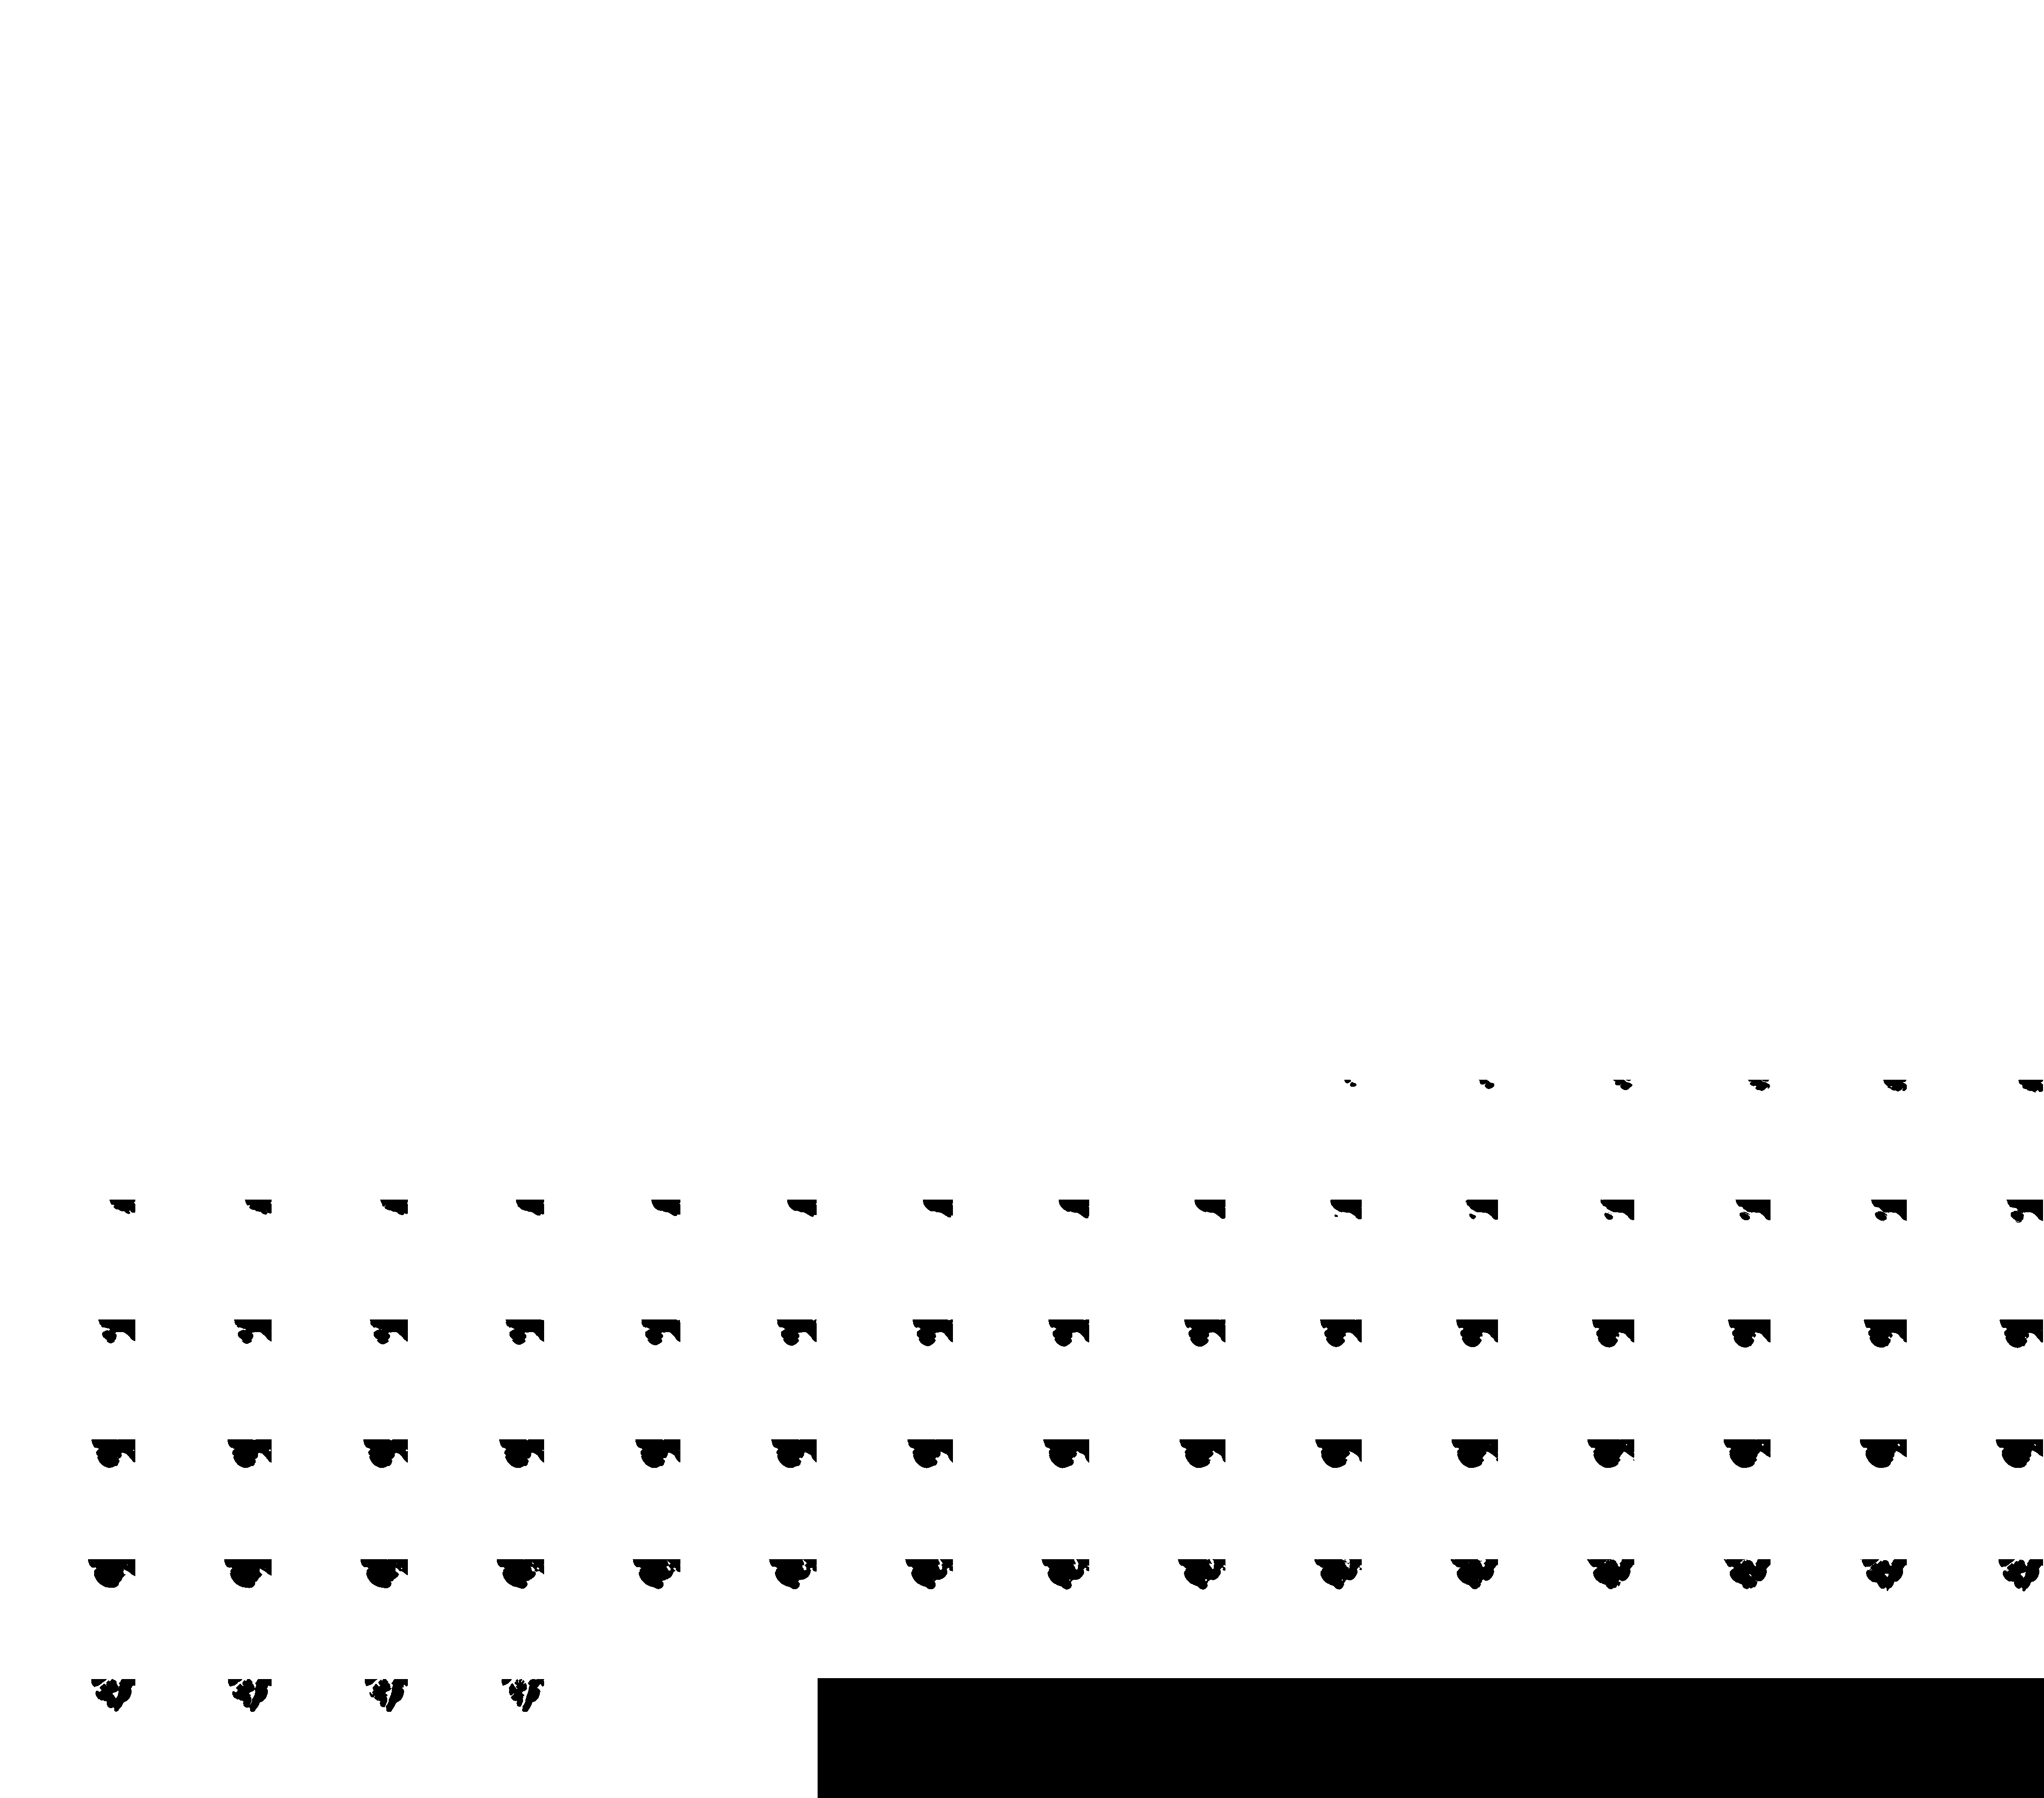
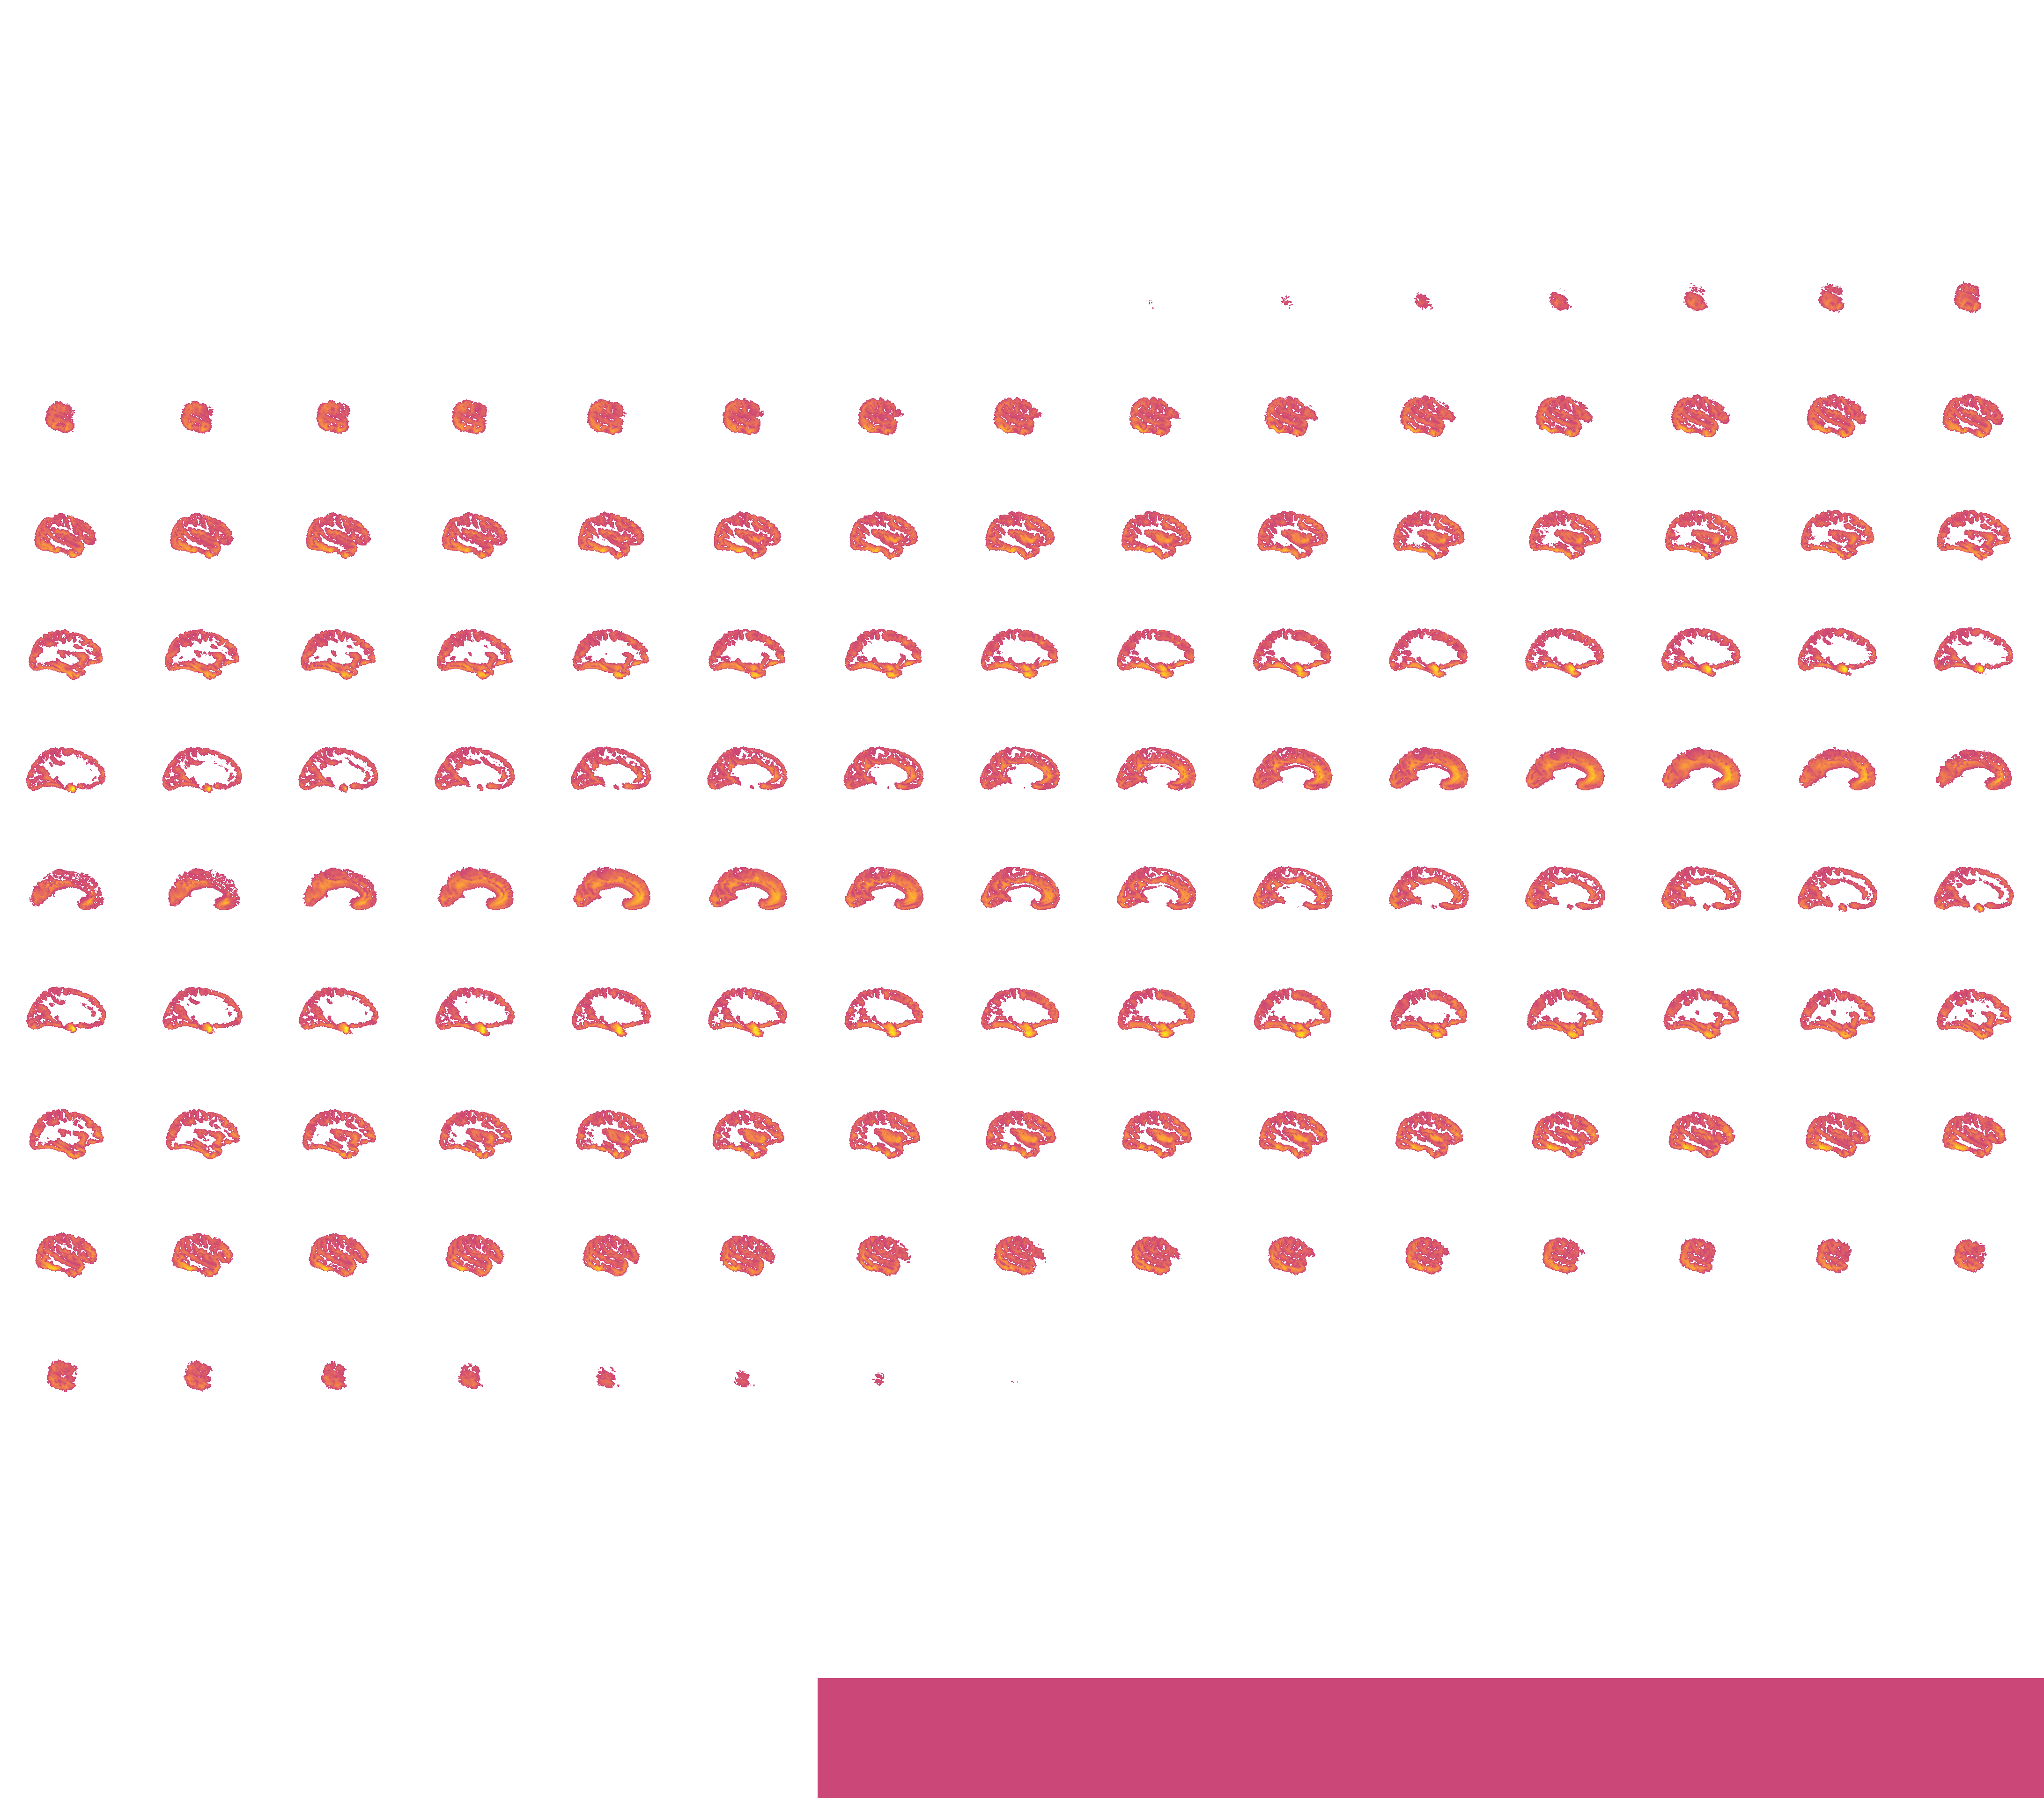

In [53]:
from nilearn.plotting import plot_anat, view_img
view_img(Pitt_0050003, bg_img = False, cmap = "plasma")

The different colors on this image, different shades of pink and orange, represent thicker or thinner areas of the grey matter.

#### *Deciding on and loading the Atlas*

In order to provide a more clear view of the coritcal thickness data we are working with, we decided to implement an atlas that partialises our images into 148 different areas and calculates the mean thickness of this area. This allows for easier comparison between the different groups to establish whether differences exist.

<div class="alert alert-warning"> We decided to use the destrieux atlas for this partialisation. WHY!!</div>

Now that we have picked which Atlas we wish to use to map and mask our data for easier analysis, we must download it and see again what we are working with.

First of all, its important to have all the packages we wish to use in this proces downloaded.

In [42]:
from nilearn.image import load_img
from nilearn.maskers import NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_destrieux_2009
from nilearn.plotting import plot_roi, plot_stat_map
from numpy import recarray

import numpy as np

We can now fetch our Atlas.

In [43]:
destrieux_dataset = fetch_atlas_destrieux_2009(lateralized=True)

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/datasets/atlas.py:284: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [44]:
destrieux_atlas = load_img(destrieux_dataset.maps)

In [45]:
destrieux_atlas.shape

(76, 93, 76)

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


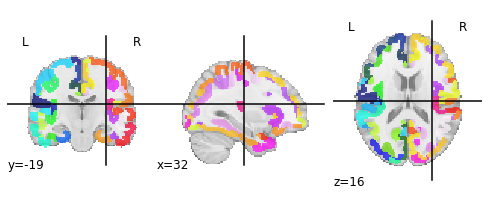

In [46]:
plot_roi(destrieux_atlas)

In [47]:
np.unique(destrieux_atlas.dataobj)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150], dtype=int32)

We are working with 148 grey matter regions, as we can see here. The Atlas also provides us with labels for these regions.

In [48]:
lables = destrieux_dataset.labels
lables

rec.array([(  0, 'Background'), (  1, 'L G_and_S_frontomargin'),
           (  2, 'L G_and_S_occipital_inf'),
           (  3, 'L G_and_S_paracentral'), (  4, 'L G_and_S_subcentral'),
           (  5, 'L G_and_S_transv_frontopol'),
           (  6, 'L G_and_S_cingul-Ant'),
           (  7, 'L G_and_S_cingul-Mid-Ant'),
           (  8, 'L G_and_S_cingul-Mid-Post'),
           (  9, 'L G_cingul-Post-dorsal'),
           ( 10, 'L G_cingul-Post-ventral'), ( 11, 'L G_cuneus'),
           ( 12, 'L G_front_inf-Opercular'),
           ( 13, 'L G_front_inf-Orbital'),
           ( 14, 'L G_front_inf-Triangul'), ( 15, 'L G_front_middle'),
           ( 16, 'L G_front_sup'), ( 17, 'L G_Ins_lg_and_S_cent_ins'),
           ( 18, 'L G_insular_short'), ( 19, 'L G_occipital_middle'),
           ( 20, 'L G_occipital_sup'), ( 21, 'L G_oc-temp_lat-fusifor'),
           ( 22, 'L G_oc-temp_med-Lingual'),
           ( 23, 'L G_oc-temp_med-Parahip'), ( 24, 'L G_orbital'),
           ( 25, 'L G_pariet_inf-Angul

It's important to check whether the data and the Atlas are present in the same space. If they are not, we can not use the masker as there are no brain images that the masker can be mapped onto.

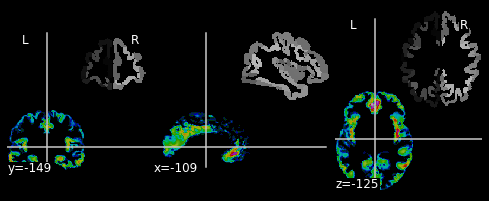

In [54]:
plot_roi(Pitt_0050003, bg_img=destrieux_atlas)

This image highlights the issue we mentioned above - the atlas and the test image are not in fact in the same space. This means that the atlas is not mapping onto the brain image. So we must move the image into the correct space.

#### *Adjusting the image*

In order to allign the atlas and the image, we must:
- get a different version of the thickness data
- get the transformations we need to transform the thickness data from the given participant's space to the template space, specifically MNI152NLin2009cAsym

It becomes very clear here why we explore a small set, or even just one image, of a dataset before downloading everything and working with that. 

We have to start by getting a different version of cortical thickness data than we had initially planned to download.

In [37]:
url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/mindboggle_swf/mindboggle/ants_subjects/sub-0050003/antsCorticalThickness.nii.gz" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/sub-0050003_desc-corticalthickness.nii.gz')

('/Users/gretivan/Desktop/sub-0050005_desc-corticalthickness.nii.gz',
 <http.client.HTTPMessage at 0x7f8b9abf60f0>)

Next we must get the transformations from the participant to the template space.

In [39]:
url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/fmriprep/fmriprep/sub-0050003/anat/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5" 
urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5')

('/Users/gretivan/Desktop/sub-0050005_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5',
 <http.client.HTTPMessage at 0x7f8b9abf6780>)

Next we must download the template image.

In [1]:
from templateflow import api as tflow

mni152 = tflow.get('MNI152NLin2009cAsym', desc=None, resolution=1,
                    suffix='T1w', extension='nii.gz')
mni152

PosixPath('/Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz')

Now that we have downloaded a different version of the image and transformations, we can apply these transformations using ANTs (Advanced Normalisation Tool). During the downloading process and application of the antsApplyTransforms, we came across some issues. The Ants tool would not show up as an available command as bash would not access the bashrc file. In order to resolve this issue, we added an extra export path to bash with the path where the Ants file is located. 

In [2]:
import nipype
from nipype.interfaces.ants import ApplyTransforms

In [3]:
%%bash
export PATH=/Users/gretivan/Desktop/ants-2.4.3/bin:$PATH
echo $PATH

/Users/gretivan/Desktop/ants-2.4.3/bin:/Users/gretivan/Desktop/ants-2.4.3/bin:/Users/gretivan/miniconda3/envs/neuro_ai/bin:/Users/gretivan/miniconda3/condabin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin


In [4]:
%%bash
antsApplyTransforms  -i /Users/gretivan/Desktop/sub-0050003_desc-corticalthickness.nii.gz -r /Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz -t /Users/gretivan/Desktop/sub-0050003_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5 -o /Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz

In [87]:
from nilearn.plotting import plot_img

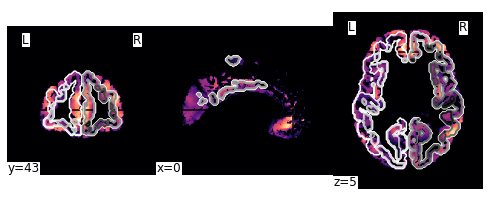

In [88]:
fig = plot_img('/Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz', cmap='magma')
fig.add_contours(destrieux_atlas, cmap='Greys')

This looks much better. We are now working with an image and an atlas in the same space. 

We must apply this transformation to all of the data we are planning to download. We can achieve this by creating a loop.

But before we do this, we should test out whether the destrieux atlas can be used as a masker for this data to allow for the assessment of 2D cortical thickness data as opposed to a 3D image. It will help us when looking at differences between groups.

In [55]:
destrieux_masker = NiftiLabelsMasker(labels_img=destrieux_atlas)
thickness_sub0050003 = destrieux_masker.fit_transform('/Users/gretivan/Desktop/sub-0050003_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz')

In [56]:
thickness_sub0050003.shape

(1, 148)

We now have data with only two dimensions.

In [57]:
thickness_sub0050003

array([[1.24944175, 2.34536168, 0.606836  , 1.71352572, 1.52545434,
        3.10993156, 2.04731399, 2.10898342, 2.92694597, 1.52362547,
        1.25300568, 1.78683702, 1.36531509, 1.33183801, 1.72617632,
        1.79656362, 2.45268168, 3.06566965, 1.91948329, 1.06945715,
        3.09177802, 1.51964456, 2.92252828, 1.61312081, 1.33889796,
        1.75681046, 0.82938553, 0.79790724, 1.27660216, 1.80350527,
        2.29007522, 0.92637947, 1.33526913, 1.97557859, 1.29265578,
        1.15743216, 2.56120038, 2.35720902, 1.17724812, 1.49941028,
        1.3729409 , 1.41701773, 2.84152904, 1.25315129, 0.46842935,
        1.03995316, 1.60925862, 0.85085033, 1.84187833, 2.91596348,
        2.02335056, 1.37771389, 0.84202682, 1.40546209, 0.86230999,
        0.8225973 , 0.99084249, 1.25135441, 2.01259242, 3.08581815,
        2.71363081, 0.60009495, 0.88043531, 1.34770937, 1.15595373,
        0.83335493, 0.80230146, 1.0742383 , 0.84154005, 3.80625478,
        2.01734593, 1.77281437, 1.52858828, 0.67

The array for this specific image provides mean cortical thickness of each area in the destrieux atlas.

#### *Downloading all the files*

Now that we have established what kind of data we are working with, what atlas we are wanting to use, and what kind of preprocessing is needed to make sure that the masker works, we can download the full matched sample.

In [58]:
failed_download = []

for subject in joined_list:
    print(subject, end=", ")
    try:
        # Downloading different cortical thickness images
        url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/mindboggle_swf/mindboggle/ants_subjects/sub-00%s/antsCorticalThickness.nii.gz" %(subject) 
        urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Neuro_data/sub-00%s_desc-corticalthickness.nii.gz'%(subject))
        # Downloading transformation template for thickness images 
        url = "https://fcp-indi.s3.amazonaws.com/data/Projects/ABIDE/Outputs/fmriprep/fmriprep/sub-00%s/anat/sub-00%s_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5" %(subject, subject)
        urllib.request.urlretrieve(url, '/Users/gretivan/Desktop/Neuro_data/sub-00%s_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5'%(subject))
    except urllib.error.HTTPError:
        failed_download.append(subject)
        
print(failed_download)



50005, 50243, 50023, 50148, 50029, 50823, 50057, 50191, 50119, 50686, 50125, 50652, 50127, 50411, 50185, 51236, 50276, 50273, 50278, 50805, 50284, 50286, 50285, 50298, 50300, 50310, 50302, 51214, 50309, 50982, 50319, 50120, 50321, 50124, 50407, 50405, 50604, 50155, 50615, 51175, 50619, 50517, 50620, 50618, 50621, 50608, 50623, 51239, 50624, 50626, 50627, 50978, 50644, 50711, 50648, 51320, 50650, 51582, 50743, 50323, 50744, 50613, 50749, 50235, 50792, 50802, 50795, 51348, 50796, 50122, 50798, 50791, 50952, 51011, 50953, 50800, 50954, 50522, 50955, 50294, 50956, 51300, 50957, 51220, 50958, 50144, 50959, 51459, 50960, 50651, 50961, 50499, 50962, 50003, 51162, 50609, 51164, 50793, 51167, 51165, 51170, 50993, 51207, 50183, 51215, 51202, 51219, 50972, 51226, 50965, 51228, 51166, 51230, 51472, 51242, 50510, 51321, 51330, 51325, 50708, 51460, 50497, 51462, 51465, 51463, 50477, 51471, 51019, 51606, 51322, 50036, 50417, 50038, 50568, 50049, 50427, 50059, 51156, 50113, 50116, 50114, 51556, 50201,

During the download we noticed some files were unable to be downloaded. These are shown in a failed_download list.

In [59]:
print(failed_download)

[50309, 50517, 50323, 50522, 50499, 51242, 50510, 50497, 50477, 50049, 50423, 50436, 50432, 50722, 50460, 50472, 50450]


In [60]:
successful_download = [50005, 50243, 50023, 50148, 50029, 50823, 50057, 50191, 50119, 50686, 50125, 50652, 50127, 50411, 50185, 51236, 50276, 50273, 50278, 50805, 50284, 50286, 50285, 50298, 50300, 50310, 50302, 51214, 50982, 50319, 50120, 50321, 50124, 50407, 50405, 50604, 50155, 50615, 51175, 50619, 50620, 50618, 50621, 50608, 50623, 51239, 50624, 50626, 50627, 50978, 50644, 50711, 50648, 51320, 50650, 51582, 50743, 50744, 50613, 50749, 50235, 50792, 50802, 50795, 51348, 50796, 50122, 50798, 50791, 50952, 51011, 50953, 50800, 50954, 50955, 50294, 50956, 51300, 50957, 51220, 50958, 50144, 50959, 51459, 50960, 50651, 50961, 50962, 50003, 51162, 50609, 51164, 50793, 51167, 51165, 51170, 50993, 51207, 50183, 51215, 51202, 51219, 50972, 51226, 50965, 51228, 51166, 51230, 51472, 51321, 51330, 51325, 50708, 51460, 51462, 51465, 51463, 51471, 51019, 51606, 51322, 50036, 50417, 50038, 50568, 50427, 50059, 51156, 50113, 50116, 50114, 51556, 50201, 50043, 50205, 50206, 50554, 50208, 50213, 51199, 50215, 51128, 50336, 51269, 50338, 51097, 50340, 50330, 50341, 50344, 50343, 51276, 50348, 51112, 50353, 51314, 50354, 50575, 50356, 50331, 50357, 51280, 50361, 50369, 50422, 50373, 50391, 50374, 50165, 50375, 50378, 50379, 51100, 50380, 50328, 50414, 51135, 50555, 51101, 50557, 51075, 50558, 51099, 50563, 50727, 50565, 50571, 50569, 50570, 50572, 51140, 50576, 50809, 50656, 50698, 50661, 50109, 50669, 51343, 50200, 50723, 50360, 50730, 50578, 50735, 50050, 50736, 50426, 50778, 50816, 50780, 51085, 50783, 50359, 50784, 51080, 50788, 50159, 50790, 51081, 50810, 51281, 50812, 50817, 50820, 50164, 51036, 51069, 51038, 51183, 51039, 50814, 51040, 50777, 51041, 51082, 51042, 51083, 51044, 50773, 51045, 51262, 51046, 50158, 51047, 51094, 51048, 50822, 51049, 51137, 51050, 51096, 51051, 51266, 51052, 50573, 51053, 50383, 51054,  51055, 51265, 51056, 51077, 51057, 50262, 51058, 51059, 51115, 51060, 51150, 51061, 51559, 51062, 51481, 51063, 51118, 51180, 50564, 51184, 50161, 51188, 50162, 51192, 50333, 51264, 51272, 51267, 50362, 51279, 51260, 51282, 50552, 51303, 51359, 51305, 51136, 51366, 51369, 51368, 50041, 51370, 51363, 51372, 51373, 51479, 51146, 51480, 51483, 51482, 51493, 51339]

In [63]:
len(successful_download)

311

In [64]:
len(failed_download)

17

### <div class="alert alert-danger"> Since there were failed downloads, lets recheck the demographics.

In [74]:
successful_demographics = Data_overview.loc[Data_overview['subject'].isin(successful_download)]

In [75]:
successful_demographics

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1080,1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1083,1083,1084,51559,1084,51559,SBL,SBL_0051559,2,0,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
1106,1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


In [76]:
successful_demographics.describe()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,...,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_num_fd,func_perc_fd,func_gsr,SUB_IN_SMP
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,94.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,311.000000
mean,580.099678,581.099678,50788.311897,581.099678,50788.311897,1.610932,-771.135048,15.599116,1.514469,-155.904255,...,107.505379,2.174188,1.090451,0.006264,0.011391,0.116046,23.035599,11.142548,0.025744,0.408360
std,306.012396,306.012396,426.120741,306.012396,426.120741,0.488324,2672.792656,7.120146,0.500596,1459.767555,...,46.756526,0.367685,0.119160,0.006303,0.010334,0.140554,39.766551,16.604553,0.021717,0.492323
min,1.000000,2.000000,50003.000000,2.000000,50003.000000,1.000000,-9999.000000,7.660000,1.000000,-9999.000000,...,33.836513,1.621089,0.709671,0.000197,0.001693,0.016117,0.000000,0.000000,-0.015812,0.000000
25%,297.500000,298.500000,50374.500000,298.500000,50374.500000,1.000000,0.000000,11.080000,1.000000,44.500000,...,72.303412,1.872158,1.008803,0.001406,0.005826,0.045322,1.000000,0.552486,0.010012,0.000000
50%,614.000000,615.000000,50798.000000,615.000000,50798.000000,2.000000,0.000000,13.780000,2.000000,69.000000,...,94.165911,2.080066,1.076446,0.005738,0.009097,0.073796,7.000000,3.654485,0.028792,0.000000
75%,821.500000,822.500000,51138.500000,822.500000,51138.500000,2.000000,1.000000,17.355000,2.000000,89.000000,...,134.382319,2.432877,1.165317,0.008300,0.014300,0.128553,24.000000,14.012739,0.040802,1.000000
max,1110.000000,1111.000000,51606.000000,1111.000000,51606.000000,2.000000,4.000000,46.000000,2.000000,100.000000,...,264.504674,3.489361,1.508322,0.035617,0.098614,1.224343,288.000000,91.735537,0.104225,1.000000


We can see here that we still have a relatively even split of Sex as well as of the Autism vs. control groups. The average age of the participants is 16. 

<div class="alert alert-danger"> We can see from the failed_download list that there are 17 subjects where the images were unable to be downloaded. Even though this again reduces the sample, we decided to, instead of rematching the 17 that are now left unmatched, apply an algorithm that takes these group differences into account.

The next thing to do, now that we have a list of successfully downloaded participant IDs, is to apply the transformation to all of them to create a 3rd transformed file. To do this, we use a loop with the syntax from above where we initially applied the transformation to one participant. 

In [69]:
successful_list_str = ' '.join([str(subject) for subject in successful_download])

In [70]:
%%bash -s "$successful_list_str"

for subject in $1
do
echo $subject
antsApplyTransforms -i /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_desc-corticalthickness.nii.gz -r /Users/gretivan/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz -t /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_from-T1w_to-MNI152NLin2009cAsym_mode-image_xfm.h5 -o /Users/gretivan/Desktop/Neuro_data/sub-00${subject}_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz
done

50005
50243
50023
50148
50029
50823
50057
50191
50119
50686
50125
50652
50127
50411
50185
51236
50276
50273
50278
50805
50284
50286
50285
50298
50300
50310
50302
51214
50982
50319
50120
50321
50124
50407
50405
50604
50155
50615
51175
50619
50620
50618
50621
50608
50623
51239
50624
50626
50627
50978
50644
50711
50648
51320
50650
51582
50743
50744
50613
50749
50235
50792
50802
50795
51348
50796
50122
50798
50791
50952
51011
50953
50800
50954
50955
50294
50956
51300
50957
51220
50958
50144
50959
51459
50960
50651
50961
50962
50003
51162
50609
51164
50793
51167
51165
51170
50993
51207
50183
51215
51202
51219
50972
51226
50965
51228
51166
51230
51472
51321
51330
51325
50708
51460
51462
51465
51463
51471
51019
51606
51322
50036
50417
50038
50568
50427
50059
51156
50113
50116
50114
51556
50201
50043
50205
50206
50554
50208
50213
51199
50215
51128
50336
51269
50338
51097
50340
50330
50341
50344
50343
51276
50348
51112
50353
51314
50354
50575
50356
50331
50357
51280
50361
50369
50422
50373
5039

After downloading the data, and transforming it to the correct space, we need to apply the masker and save it in a dictionary.

In [ ]:
output = {}
for subject in successful_download:
    print(subject, end=',')
    
        # Apply the masker to each subject
    destrieux_masker = NiftiLabelsMasker(labels_img=destrieux_atlas)
    temp = destrieux_masker.fit_transform('/Users/gretivan/Desktop/Neuro_data/sub-00%s_space-MNI152NLin2009cAsym_desc-corticalthickness.nii.gz'%(subject))
    output[subject] = temp
    np.save('/Users/gretivan/Desktop/Neuro_data/sub-00%s_destrieux-corticalthickness.npy'%(subject), temp)
        

In [73]:
print(output)

{50005: array([[1.88431166, 1.76320336, 1.11390663, 1.48948011, 1.57417584,
        2.97995139, 2.38282191, 2.2512736 , 3.48374256, 1.81977405,
        0.75322368, 1.95353456, 2.23619082, 1.48573905, 1.86495464,
        2.11882744, 2.40894353, 3.53348546, 1.8843735 , 0.93950251,
        2.15076486, 1.46824549, 2.35921589, 2.09702396, 1.6438221 ,
        1.73707352, 1.101166  , 0.93737361, 1.41206387, 2.19841133,
        2.00448107, 0.91124679, 1.14893239, 2.66672103, 1.22886184,
        1.47507838, 2.32726174, 2.73099436, 1.6916697 , 1.66477398,
        1.27619732, 0.89819511, 2.73064589, 1.34446161, 0.40929411,
        1.20095507, 1.83660777, 0.8791849 , 1.77808816, 3.15361791,
        2.12237219, 1.37161697, 1.17744452, 1.27603078, 0.82204156,
        1.10068347, 1.00103868, 0.80338873, 2.3565658 , 2.75643984,
        2.54019814, 0.72897244, 0.82760495, 1.62765494, 1.3111408 ,
        1.2412859 , 0.84518014, 1.00472426, 1.28115383, 3.01723173,
        2.1098516 , 1.59073786, 1.474894

#### *Logistic Regression, Support Vector Machine, Random forest*

<div class="alert alert-danger"> Pipeline?

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
control_masked = control.loc[control['subject'].isin(successful_download)]
control_masked

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
34,34,35,50038,35,50038,PITT,Pitt_0050038,2,0,13.95,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
37,37,38,50041,38,50041,PITT,Pitt_0050041,2,0,27.92,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
39,39,40,50043,40,50043,PITT,Pitt_0050043,2,0,13.78,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,1
46,46,47,50050,47,50050,PITT,Pitt_0050050,2,0,14.37,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1068,1069,51482,1069,51482,CALTECH,Caltech_0051482,2,0,21.10,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1069,1069,1070,51483,1070,51483,CALTECH,Caltech_0051483,2,0,20.90,...,dorsal cropped,OK,NaN,fail,Ic-parietal,OK,NaN,OK,NaN,0
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1080,1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0


In [81]:
asd_masked = asd.loc[asd['subject'].isin(successful_download)]
asd_masked

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
53,53,54,50057,54,50057,PITT,Pitt_0050057,1,1,12.62,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1051,1052,51465,1052,51465,CALTECH,Caltech_0051465,1,1,20.20,...,NaN,maybe,large-ventricals,OK,NaN,OK,NaN,OK,NaN,0
1057,1057,1058,51471,1058,51471,CALTECH,Caltech_0051471,1,4,22.40,...,front lost,OK,NaN,fail,ic-frontal-temporal-cerebellum,OK,NaN,OK,NaN,0
1058,1058,1059,51472,1059,51472,CALTECH,Caltech_0051472,1,1,17.50,...,dorsal cropped,OK,NaN,fail,Ic-parietal,OK,NaN,OK,NaN,0
1106,1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


In [82]:
female_masked = female.loc[female['subject'].isin(successful_download)]
female_masked

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
34,34,35,50038,35,50038,PITT,Pitt_0050038,2,0,13.95,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,1066,51479,1066,51479,CALTECH,Caltech_0051479,2,0,20.00,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1066,1066,1067,51480,1067,51480,CALTECH,Caltech_0051480,2,0,20.80,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0
1068,1068,1069,51482,1069,51482,CALTECH,Caltech_0051482,2,0,21.10,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0


In [83]:
male_masked = male.loc[male['subject'].isin(successful_download)]
male_masked

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
37,37,38,50041,38,50041,PITT,Pitt_0050041,2,0,27.92,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
39,39,40,50043,40,50043,PITT,Pitt_0050043,2,0,13.78,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,1
46,46,47,50050,47,50050,PITT,Pitt_0050050,2,0,14.37,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,1
64,64,65,50109,65,50109,OLIN,Olin_0050109,2,0,20.00,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,1067,1068,51481,1068,51481,CALTECH,Caltech_0051481,2,0,27.90,...,NaN,OK,NaN,maybe,small brain,OK,NaN,OK,NaN,0
1069,1069,1070,51483,1070,51483,CALTECH,Caltech_0051483,2,0,20.90,...,dorsal cropped,OK,NaN,fail,Ic-parietal,OK,NaN,OK,NaN,0
1080,1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1083,1083,1084,51559,1084,51559,SBL,SBL_0051559,2,0,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


In [84]:
successful = Data_overview.loc[Data_overview['subject'].isin(successful_download)]
successful

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
19,19,20,50023,20,50023,PITT,Pitt_0050023,1,1,12.64,...,NaN,OK,NaN,maybe,ic-cerebellum_temporal_lobe,OK,NaN,OK,NaN,0
25,25,26,50029,26,50029,PITT,Pitt_0050029,1,1,11.40,...,NaN,maybe,skull-striping fail,fail,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
32,32,33,50036,33,50036,PITT,Pitt_0050036,2,0,13.28,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1079,1080,51493,1080,51493,CALTECH,Caltech_0051493,2,0,29.20,...,NaN,OK,NaN,maybe,Ic-parietal-minor,OK,NaN,OK,NaN,0
1080,1080,1081,51556,1081,51556,SBL,SBL_0051556,2,0,20.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1083,1083,1084,51559,1084,51559,SBL,SBL_0051559,2,0,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0
1106,1106,1107,51582,1107,51582,SBL,SBL_0051582,1,2,31.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


Look for cross validation method.
- shape data properly - x = subject by feature, y = asd vs td, male vs female 
- split into training and test set
- create prediction model thats interchangable 
- func to evaluate how good model is
- func for plotting

In [88]:
y = successful[['DX_GROUP', 'SEX']].to_numpy()

google multiclass logistic regression 

## Normalisation of X and Y?

In [197]:
X = np.zeros((len(successful), 148))
y = np.zeros((len(successful), 2))


for idx, subject in enumerate(successful['subject'].to_numpy()):
    try:
        X[idx] = np.load('/Users/gretivan/Desktop/Neuro_data/sub-00%s_destrieux-corticalthickness.npy'%(subject))
        y[idx] = successful.loc[successful['subject'] == subject][['DX_GROUP', 'SEX']].to_numpy()
    except FileNotFoundError:
        print(subject)
            

51471


Notes from meeting:
   - normalisaition -> jedes feature, mit scalar? 
   - correlations between features (janos)
   - In einem plot alle plots kreiieren mit sklearn for logistic regression
 

In [101]:
from sklearn.model_selection import train_test_split

In [216]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 

scalar = preprocessing.StandardScaler()

y_pred = np.zeros(len(y)) 

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)
StratifiedKFold(n_splits=2, random_state=0, shuffle=True)
for i, (train_index, test_index) in enumerate(skf.split(X, y[:,0])):
    x_train = X[train_index]
    x_test = X[test_index]
    y_train = y[train_index, 0]
    y_test = y[test_index, 0]
    
    x_train = scalar.fit_transform(x_train)
    
    clf = LogisticRegression(C=0.1, random_state=0)
    clf.fit(x_train, y_train)
    y_pred[test_index] = clf.predict(scalar.transform(x_test))
    
    
    
    

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [230]:
def model_func(X, y, group):
    for i, (train_index, test_index) in enumerate(skf.split(X, y[:,group])):
        x_train = X[train_index]
        x_test = X[test_index]
        y_train = y[train_index, 0]
        y_test = y[test_index, 0]

        x_train = scalar.fit_transform(x_train)

        clf = LogisticRegression(C=0.1, random_state=0)
        clf.fit(x_train, y_train)
        y_pred[test_index] = clf.predict(scalar.transform(x_test))
    
    return y_pred, y_train, y_test, x_train, x_test

In [201]:
y.shape

(311, 2)

In [231]:
y_sex,y_train_sex,y_test_sex, x_train_sex, x_test_sex = model_func(X,y,group=1)

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [234]:
y_asd,y_train_asd,y_test_asd,x_train_asd, x_test_asd = model_func(X,y,group=0)

/Users/gretivan/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


<AxesSubplot:>

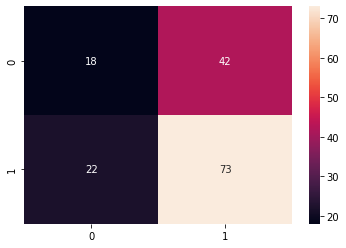

In [235]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

cm_group = confusion_matrix(y_test_group, y_group[155:310])

sns.heatmap(cm_group, annot = True)

In [228]:
clf.score(scalar.transform(x_test),y_test)

0.5806451612903226

scalar transform for normalisation of x and y. Used in x_train so have to use in x_test.

In [229]:
clf.score(x_train,y_train)

0.9487179487179487

In [109]:
print (y, y_pred)

[[1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [1. 2.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [1. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [1. 1.]
 [1. 2.]
 [1. 1.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [2. 1.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [1. 1.]
 [1. 2.]
 [1. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [1. 1.]
 [1. 2.]
 [1. 1.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [1. 2.]
 [1. 1.]
 